In [1]:
! pwd

/home/bsherwin51/Renaissance/Void


In [1]:
import h5py as h

In [2]:
ds = h.File('catalog.h5')
print(ds)

<HDF5 file "catalog.h5" (mode r)>


In [3]:
print(len(ds.keys())) # only 168 halos now

89


In [4]:
for key in ds.keys():
    print(ds[key].keys())
    break

<KeysViewHDF5 ['M_HI', 'M_HII', 'Mstar', 'Mstar_pop2', 'Mstar_pop2_young', 'Mstar_pop3', 'Nesc', 'Ntot', 'NumberOfPop2Stars', 'NumberOfPop3Stars', 'SFR', 'center', 'fesc', 'fgas', 'fstar', 'mass', 'redshift', 'rvir']>


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
all_groups = {}
fescs = []
groups = []
fgases = []
masses = []
SFRs = [] 
Mstars = []
redshifts = []
for halo in ds.keys(): # loops through halos
    fesc_list = list(ds[halo]['fesc'])
    fgas_list = list(ds[halo]['fgas'])
    mass_list = list(ds[halo]['mass'])
    SFR_list = list(ds[halo]['SFR'])
    Mstar_list = list(ds[halo]['Mstar'])
    redshift_list = list(ds[halo]['redshift'])    
    for index, fesc in enumerate(fesc_list):# loops thru timestep
        if fesc <= 0.01:
            group = 0
        elif 0.01 < fesc <= 0.10:
            group = 1
        elif 0.10 < fesc <= 0.25:
            group = 2
        else:
            group = 3
        # used enumerate to find index and only use "good" values
        if fesc >= 1e-5:
            fescs.append(fesc)
            groups.append(group)
            fgases.append(ds[halo]['fgas'][index])
            masses.append(ds[halo]['mass'][index])
            SFRs.append(ds[halo]['SFR'][index])
            Mstars.append(ds[halo]['Mstar'][index])
            redshifts.append(ds[halo]['redshift'][index])
    all_groups[halo] = groups

# Sanity check: All parameter arrays should be same size
print(len(fescs), len(fgases), len(masses), len(SFRs), len(Mstars), len(redshifts)) # length is 3122 for all

# Sanity check 2: Length of all_groups should be same as number of halos
print(len(ds.keys()) == len(all_groups)) # length is 168




800 800 800 800 800 800
True


In [7]:
print(np.unique(redshifts))

[ 9.90037061  9.99989    10.1000111  10.19946243 10.29943503 10.3999088
 10.49954002 10.59958242 10.7000117  10.79941003 10.90051172 11.00048002
 11.10067764 11.19958521 11.300123   11.39925604 11.5        11.59921885
 11.7000254  11.80081925 11.8998968  12.00052002 12.09929264 12.19957761
 12.29964091 12.39943722 12.45713901 12.5998912  12.70050692 12.80071764
 12.90047262 12.99972001 13.10039481 13.20051122 13.3000143  13.40092166
 13.49905756 13.60067163 13.69939732 13.79946722 13.90090896 13.99925004
 14.10117789 14.1998784  14.2998776  14.40120129 14.49907006 14.60062402
 14.70105197 14.80028441 14.90077914 15.         15.10046691 15.19957881
 15.2999185  15.39881929 15.49892757 15.6002656  15.7000668  15.80107527
 15.90045631 16.00102006 16.1998624  16.40038281 16.59943682 16.7999288
 16.99856012 17.20167455 17.39926403 17.60119048 17.80052641 18.00057002
 18.20122888 18.3986421  18.6001568  18.79805979 19.         19.3998368
 19.79866889 21.99908004]


In [16]:
closest_halo_dist = [] # all halos concatenation of min_dist_at_z's

for i, halo1 in enumerate(ds.keys()):
    print(f"i = {i}")
    center_list = list(ds[halo1]['center'])
    n_redshifts_halo1 = len(list(ds[halo1]['redshift']))
    min_dist_at_z = [] # array of minimum distances at each redshift for halo N
    
    for z in range(n_redshifts_halo1):
        dist_to_halo1= [] # array of ALL distances at each redshift for halo N
        
        for j,halo2 in enumerate(ds.keys()):
            
            if i == j:
                continue
            
            center_list2 = list(ds[halo2]['center'])
            n_redshifts_halo2 = len(list(ds[halo2]['redshift']))
           
            
            if z >= n_redshifts_halo2:
                continue
                
            
            halo1_center = center_list[z]
            halo2_center = center_list2[z]
            
    
            dist_to_halo1.append(np.sqrt((halo1_center[0]-halo2_center[0])**2 + (halo1_center[1]-halo2_center[1])**2 + (halo1_center[2]-halo2_center[2])**2 ))
        

        if len(dist_to_halo1) == 0:
            continue
            
        min_dist_at_z.append(min(dist_to_halo1)) # PROBLEM WITH THIS
    
    closest_halo_dist.append(min_dist_at_z)


i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88


In [17]:
arr = np.array(closest_halo_dist)
np.save('min_dist_void', arr)

/tmp/ipykernel_1501/336982491.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(closest_halo_dist)


In [9]:
from yt.utilities.cosmology import Cosmology

co = Cosmology()

 
all_t_lookbacks = []
for halo in ds.keys():
    t_lookbacks_halo = []
    for z_idx in range(len(list(ds[halo]['redshift']))):
        t_lookback = co.t_from_z(0) - co.t_from_z(ds[halo]['redshift'][z_idx])
        t_lookbacks_halo.append(t_lookback)
    all_t_lookbacks.append(t_lookbacks_halo)

In [15]:
arr2 = np.array(all_t_lookbacks)
np.save('t_lookback_void', arr2)

/tmp/ipykernel_1501/2575207237.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.array(all_t_lookbacks)


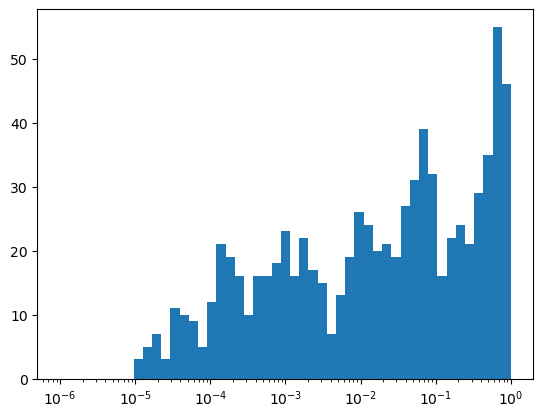

In [8]:
plt.hist(fescs, bins = np.logspace(-6, 0))
plt.xscale('log')

## Architecture

In [12]:
import torch 
import torch.nn as nn
import numpy as np
import sys, os, time
import optuna # Optimizer

In [13]:
# 1 hidden layer code

# inp ---------> size of input data
# h1 ----------> size of first hidden layer
# out ---------> size of output data
# dr ----------> dropout rate
class model_1hl(nn.Module):
    
    def __init__(self, inp, h1, out, dr):
        super(model_1hl, self).__init__()

        self.fc1 = nn.Linear(inp, h1) # lin trans
        self.fc2 = nn.Linear(h1,  out)
        
        self.dropout   = nn.Dropout(p=dr) #normalizes by zeroing at random
        self.ReLU      = nn.ReLU() # RELU(x) = max(0,x)
        self.LeakyReLU = nn.LeakyReLU(0.2) # LeakyReLU = max(0,x) + neg_slope * min(0,x)
        
        # initialize the weights of the different layers
        for m in self.modules(): 
            if isinstance(m, nn.BatchNorm3d) or isinstance(m, nn.BatchNorm1d): # if module is Batch normalization: y = gamma*(x -  E(x))/sqrt(Var(x) + eps) + b
                nn.init.constant_(m.weight, 1) 
                nn.init.constant_(m.bias, 1)
            elif isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Linear):
                 '''if module is 3D Convolution: over an input signal composed of several input planes. or ConvTranspose2d Applies a 3D transposed convolution operator over an input image composed of several input planes. The transposed convolution operator multiplies each input value element-wise by a learnable kernel, and sums over the outputs from all input feature planes. Or Lin Trans'''
                 nn.init.kaiming_normal_(m.weight) # normalization that makes extremely deep models (>30 layers) to converge
       
    # forward pass
    def forward(self, x):
        out = self.dropout(self.LeakyReLU(self.fc1(x))) # Apply leakyRELU on input and dropout normalize
        out = self.fc2(out) 
        # out = nn.Softmax(out)
        return out


In [14]:
# N hidden layer code, similar structure to above but generalized
def dynamic_model2(input_size, output_size, n_layers, hidden, dr):

    # define the tuple containing the different layers
    layers = []

    # get the hidden layers
    in_features = input_size
    for i in range(n_layers):
        out_features = hidden[i]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU(0.2))
        layers.append(nn.Dropout(dr[i]))
        in_features = out_features

    # get the last layer
    layers.append(nn.Linear(out_features, output_size))

    # return the model
    return nn.Sequential(*layers)

#model = dynamic_model2(numFeatures, outSize, numHL, [h1, h2], [dr1, dr1])

## Data

In [15]:
from random import shuffle
import torch 
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import sys, os, time, h5py
from pathlib import Path

In [16]:
def normalize_data(data, labels):
    ######################
    # normalize input
    ## the id's correspond to the id's of the feature array you made using vstack in read_data()
    data[:,0]  = (data[:,0] - np.mean(data[:,0]))/np.std(data[:,0]) # Z Scores
    data[:,1]  = (data[:,1] - np.mean(data[:,1]))/np.std(data[:,1])
    data[:,2]  = (data[:,2] - np.mean(data[:,2]))/np.std(data[:,2])
    data[:,3]  = (data[:,3] - np.mean(data[:,3]))/np.std(data[:,3])
    data[:,4]  = (data[:,4] - np.mean(data[:,4]))/np.std(data[:,4])

    ######################
    # normalize labels
    print ("labels", labels)

    # # array = np.log10(labels) # Since labels are large log them
    # print("labels array", array)
    # labels = array
    
    return data, labels

In [17]:
# read data and get training, validation or testing sets
# fin ---------> file with the data
# seed --------> random seed used to split among different datasets
# mode --------> 'train', 'valid', 'test' or 'all'
# normalize ---> whether to normalize the data or not
def read_data(fin, seed, mode, normalize): #fin for h5
    File = 'catalog.h5'
    f     = h5py.File(fin, 'r')
    masses = []
    fgases = []
    SFRs = []
    Mstars = []
    redshifts = []
    fescs = []
    groups = []
    min_dist = []
    t_lookback = []
    
    t_lookback_void = np.array(np.load('t_lookback_void.npy', allow_pickle = True))
    t_lookback_all = []
    for list_i in t_lookback_void:
        for elem in list_i:
            t_lookback_all.append(elem)
        
    min_dist_void = np.array(np.load('min_dist_void.npy', allow_pickle = True))
    min_dist_all = []
    for listi in min_dist_void:
        for elem in listi:
            min_dist_all.append(elem)
    
    
    
    
    for halo in f.keys():
        fesc_list = list(f[halo]['fesc']) 
        for index, fesc in enumerate(fesc_list):
            if fesc <= 0.01:
                group = 0
            elif 0.01 < fesc <= 0.10:
                group = 1
            elif 0.10 < fesc <= 0.25:
                group = 2
            else:
                group = 3
                
            if fesc >= 1e-5:
                masses.append(f[halo]['mass'][index])
                fgases.append(f[halo]['fgas'][index])
                SFRs.append(f[halo]['SFR'][index])
                Mstars.append(f[halo]['Mstar'][index])
                redshifts.append(f[halo]['redshift'][index])
                fescs.append(fesc)
                groups.append(group) 
                min_dist.append(min_dist_all[index])
                t_lookback.append(t_lookback_all[index])
                
    # min_SFR = np.min(SFRs[SFRs != 0])
    minsfr = 100
    for each in SFRs:
        if each < minsfr and each != 0.:
            minsfr = each
    new_SFRs = []
    for SFR in SFRs:
        if SFR == 0.0:
            new_SFRs.append(minsfr*0.9)
        else:
            new_SFRs.append(SFR)        
    # normalize data - EDIT
    ## anything not on order 10^0 - 10^1 should be logged
    masses = np.log10(masses)
    SFRs = np.log10(new_SFRs)
    Mstars = np.log10(Mstars)
    fgases = np.log10(fgases)
    min_dist = np.log10(min_dist)
    t_lookback = np.log10(t_lookback)
    
    # get data, labels and number of elements
    data = np.vstack([SFRs, Mstars, masses, redshifts, fgases, min_dist, t_lookback]).T # THESE ARE YOUR CHOSEN INPUT VARIABLES
    
    labels = np.array(groups, dtype = 'int')
    print("labels.shape", labels.shape)
    # labels = fluxes.reshape((fluxes.shape[0], fluxSize))
    elements = data.shape[0]
    
    # normalize data
    if normalize:  data, labels = normalize_data(data, labels)

    # get the size and offset depending on the type of dataset
    if   mode=='train':   size, offset = int(elements*0.70), int(elements*0.00)
    elif mode=='valid':   size, offset = int(elements*0.15), int(elements*0.70)
    elif mode=='test':    size, offset = int(elements*0.15), int(elements*0.85)
    elif mode=='all':     size, offset = int(elements*1.00), int(elements*0.00)
    else:                 raise Exception('Wrong name!')

    # randomly shuffle the cubes. Instead of 0 1 2 3...999 have a 
    # random permutation. E.g. 5 9 0 29...342
    np.random.seed(seed)
    indexes = np.arange(elements) 
    np.random.shuffle(indexes)
    indexes = indexes[offset:offset+size] #select indexes of mode

    return data[indexes], labels[indexes]



In [18]:
class make_dataset():

    def __init__(self, mode, seed, fin):

        # get data
        inp, out = read_data(fin, seed, mode, normalize=True)

        # get the corresponding bottlenecks and parameters
        self.size   = inp.shape[0]
        self.input  = torch.tensor(inp, dtype=torch.float32)
        self.output = torch.tensor(out, dtype= torch.long)
        
        print ("size of input and output", np.shape(self.input), np.shape(self.output))
        
    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.input[idx], self.output[idx]

In [19]:
def create_dataset(mode, seed, fin, batch_size, shuffle):
    data_set = make_dataset(mode, seed, fin)
    dataset_loader = DataLoader(dataset=data_set, batch_size=batch_size, shuffle=shuffle)
    return dataset_loader

## Main

In [30]:
fin = 'catalog.h5'
dataname = 'Void'      # Nickname for data
seed = 20                # remember this to reproduce split
numFeatures = 7         # number of input properties
outSize = 4          # size of wavelength array
featurelist = 'SFRs, Mstars, masses, redshifts, fgases, min_dist, t_lookback'

# OPTUNA HYPERPARMETERS
numHL = 3           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_1 = 197           # nodes in second hidden layer
h2_1 = 500
h3_1 = 319
dr1_1 = 0.37957525032509143
dr2_1 = 0.45950651430594097
dr3_1 = 0.2042671535105191
lr_1 = 0.0009094501011908492
wd_1 = 0.0001609574990955836

NEW Trial 35 finished with value: 0.9677987893422445 and parameters: {'dropout_l0': 0.37957525032509143, 'dropout_l1': 0.45950651430594097, 'dropout_l2': 0.2042671535105191, 'lr': 0.0009094501011908492, 'n_layers': 3, 'n_units_l0': 197, 'n_units_l1': 500, 'n_units_l2': 319, 'wd': 0.0001609574990955836}. Best is trial 35 with value: 0.9677987893422445.

Trial 29 finished with value: 0.9375256299972534 and parameters: {'n_layers': 4, 'n_units_l0': 184, 'dropout_l0': 0.6257722022786032, 'n_units_l1': 233, 'dropout_l1': 0.5640014992107161, 'n_units_l2': 485, 'dropout_l2': 0.6690146484827535, 'n_units_l3': 453, 'dropout_l3': 0.34893234088243874, 'lr': 0.0007864073846954546, 'wd': 0.0009484897623137635}. Best is trial 29 with value: 0.9375256299972534.

In [327]:
numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_2 = 159           # nodes in second hidden layer
h2_2 = 261
h3_2 = 498
h4_2 = 341
dr1_2 = 0.5247732081212401
dr2_2 = 0.5428883160494038
dr3_2 = 0.6662457074562445
dr4_2 = 0.35999223637030997
lr_2 = 0.0003355601280247053
wd_2 = 9.813791728274744e-05

Trial 9 finished with value: 0.9590115547180176 and parameters: {'n_layers': 4, 'n_units_l0': 159, 'dropout_l0': 0.5247732081212401, 'n_units_l1': 261, 'dropout_l1': 0.5428883160494038, 'n_units_l2': 498, 'dropout_l2': 0.6662457074562445, 'n_units_l3': 341, 'dropout_l3': 0.35999223637030997, 'lr': 0.0003355601280247053, 'wd': 9.813791728274744e-05}. Best is trial 9 with value: 0.9590115547180176.

In [331]:
numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_3 = 386           # nodes in second hidden layer
h2_3 = 15
h3_3 = 446
h4_3 = 74
dr1_3 = 0.22146227346999917
dr2_3 = 0.4856314874186121
dr3_3 = 0.6422955923882226
dr4_3 = 0.27299236681040545
lr_3 = 0.00021664429271704198
wd_3 = 0.03585248197278107

Trial 8 finished with value: 0.9592313766479492 and parameters: {'n_layers': 4, 'n_units_l0': 386, 'dropout_l0': 0.22146227346999917, 'n_units_l1': 15, 'dropout_l1': 0.4856314874186121, 'n_units_l2': 446, 'dropout_l2': 0.6422955923882226, 'n_units_l3': 74, 'dropout_l3': 0.27299236681040545, 'lr': 0.00021664429271704198, 'wd': 0.03585248197278107}. Best is trial 8 with value: 0.9592313766479492.

In [31]:
h1_non = 150
h2_non = 150
numHL_non = 2
# # # dr1 = 0.20103              # dropout rate for layer 1
dr1_non = 0.35
# # # training parameters
batch_size = 80
# # # lr         = 1.404e-3     (learning rate)
lr_non = 0.001
epochs     = 1000
# # # wd         = 1.195e-6
wd_non = 0

In [32]:
# name of output files


name   = "Normal_dynamicmodel2"
device = torch.device('cpu')
# define loss function
criterion = nn.CrossEntropyLoss()  # MSE or Cross Entropy

# get train, validation, and test sets
print('preparing dataset...')
train_loader = create_dataset('train', seed, fin, batch_size, True)
valid_loader = create_dataset('valid', seed, fin, batch_size, False)
test_loader  = create_dataset('test',  seed, fin, batch_size, False)



preparing dataset...
labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1

In [33]:
#model_non = dynamic_model2(numFeatures, outSize, numHL_non, [h1_non, h2_non], [dr1_non, dr1_non])
model = dynamic_model2(numFeatures, outSize, numHL, [h1_1, h2_1, h3_1], [dr1_1, dr2_1, dr3_1])

In [34]:
fout   = 'test_optuna_new_var.txt'
fmodel = 'test_optuna_new_var.pt'
#casts parameters/buffers to specified gpu
model.to(device=device)
#get num elements in each network parameters and sum them
network_total_params = sum(p.numel() for p in model.parameters())
print('total number of parameters in the model = %d'%network_total_params)

# define optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=lr_1, betas=(0.5, 0.999), 
                             weight_decay=wd_1)	


# load best-model, if it exists
'''
if os.path.exists(fmodel):  
    print('Loading model...')
    model.load_state_dict(torch.load(fmodel))
# get validation loss
print('Computing initial validation loss')
model.eval()
min_valid_loss, points = 0.0, 0
for x, y in valid_loader:
    with torch.no_grad():
        x    = x.to(device=device)
        y    = y.to(device=device)
        y_NN = model(x)
        min_valid_loss += (criterion(y_NN, y).item())*x.shape[0]
        points += x.shape[0]
min_valid_loss /= points
print('Initial valid loss = %.3e'%min_valid_loss)
'''
# see if results for this model are available (if you're continuing training on a model)
'''
if os.path.exists(fout):  
    dumb = np.loadtxt(fout, skiprows = 11, unpack=False)
    if dumb.size == 0:
        offset = 0
    else: offset = int(dumb[:,0][-1]+1)
else:   offset = 0
'''

# do a loop over all epochs
start = time.time()
min_valid_loss = 1000
for epoch in range(epochs):
    # do training
    train_loss, points = 0.0, 0
    model.train()
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        y_NN = model(x)
        #y = nn.Softmax(y)
        #y_NN = nn.Softmax(y_NN)
        loss = criterion(y_NN, y)
        train_loss += (loss.item())*x.shape[0]
        points     += x.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= points

    # do testing
    test_loss, points = 0.0, 0
    model.eval()
    for x, y in test_loader:
        with torch.no_grad():
            x    = x.to(device)
            y    = y.to(device)
            #y = nn.Softmax(y)
            y_NN = model(x)
            #y_NN = nn.Softmax(y_NN)
            test_loss += (criterion(y_NN, y).item())*x.shape[0]
            points    += x.shape[0]
    test_loss /= points
    
    # save model if it is better
    if test_loss<min_valid_loss:
        torch.save(model.state_dict(), fmodel)
        min_valid_loss = test_loss
        print('%03d %.3e %.3e (saving)'%(epoch, train_loss, test_loss))
    else:
        print('%03d %.3e %.3e'%(epoch, train_loss, test_loss))
    
    # save losses to file
    f = open(fout, 'a')
    f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
    f.close()
    
stop = time.time()
print('Time take (m):', "{:.4f}".format((stop-start)/60.0))

total number of parameters in the model = 261675
000 1.342e+00 1.217e+00 (saving)
001 1.232e+00 1.167e+00 (saving)
002 1.267e+00 1.175e+00
003 1.203e+00 1.132e+00 (saving)
004 1.134e+00 1.123e+00 (saving)
005 1.131e+00 1.205e+00
006 1.153e+00 1.112e+00 (saving)
007 1.133e+00 1.109e+00 (saving)
008 1.109e+00 1.123e+00
009 1.138e+00 1.115e+00
010 1.133e+00 1.089e+00 (saving)
011 1.143e+00 1.114e+00
012 1.086e+00 1.079e+00 (saving)
013 1.091e+00 1.083e+00
014 1.082e+00 1.068e+00 (saving)
015 1.103e+00 1.055e+00 (saving)
016 1.083e+00 1.073e+00
017 1.078e+00 1.062e+00
018 1.063e+00 1.050e+00 (saving)
019 1.063e+00 1.058e+00
020 1.059e+00 1.054e+00
021 1.057e+00 1.096e+00
022 1.074e+00 1.064e+00
023 1.063e+00 1.047e+00 (saving)
024 1.049e+00 1.118e+00
025 1.074e+00 1.062e+00
026 1.050e+00 1.037e+00 (saving)
027 1.057e+00 1.039e+00
028 1.046e+00 1.039e+00
029 1.034e+00 1.053e+00
030 1.057e+00 1.041e+00
031 1.050e+00 1.025e+00 (saving)
032 1.022e+00 1.071e+00
033 1.050e+00 1.044e+00
034 1.052

In [3]:
import numpy as np
losses = np.loadtxt('test_optuna_new_var.txt', delimiter = ' ')
train_losses = losses[:,1]
test_losses = losses[:,2]

# losses_1 = np.loadtxt('test_optuna1.txt', delimiter = ' ')   
# train_losses_1 = losses_1[:,1]  
# test_losses_1 = losses_1[:, 2]

# losses_2 = np.loadtxt('test_optuna2.txt', delimiter = ' ')   
# train_losses_2 = losses_2[:,1]  
# test_losses_2 = losses_2[:, 2]

# losses_3 = np.loadtxt('test_optuna3.txt', delimiter = ' ')   
# train_losses_3 = losses_3[:,1]  
# test_losses_3 = losses_3[:, 2]

# losses_non = np.loadtxt('test_new_non50epoch.txt', delimiter = ' ')
# train_losses_non = losses_non[:,1]
# test_losses_non = losses_non[:, 2]

/tmp/ipykernel_2091/71896667.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 75)


Text(0, 0.5, 'Loss')

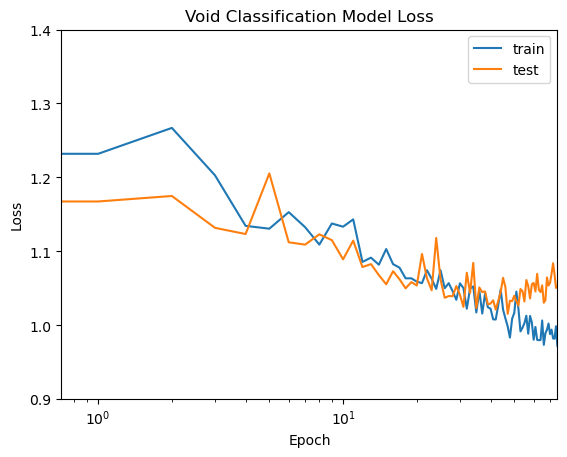

In [5]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
# plt.plot(train_losses_1, label = 'train Optuna 1')
# plt.plot(test_losses_1, label = 'test Optuna 1')
# plt.plot(train_losses_2, label = 'train Optuna 2')
# plt.plot(test_losses_2, label = 'test Optuna 2')
# plt.plot(train_losses_3, label = 'train Optuna 3')
# plt.plot(test_losses_3, label = 'test Optuna 3')
# plt.plot(train_losses_non, label = 'train no Optuna')
# plt.plot(test_losses_non, label = 'test no Optuna')
plt.xscale('log')
plt.ylim(0.9,1.4)
plt.xlim(0, 75)
plt.legend()
plt.title("Void Classification Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Optuna

In [302]:
fout   = 'test_void_new_var.txt'
fmodel = 'test_void_new_var.pt'
#casts parameters/buffers to specified gpu
model_non.to(device=device)
#get num elements in each network parameters and sum them
network_total_params = sum(p.numel() for p in model_non.parameters())
print('total number of parameters in the model = %d'%network_total_params)

# define optimizer and scheduler
optimizer = torch.optim.AdamW(model_non.parameters(), lr=lr_non, betas=(0.5, 0.999), 
                             weight_decay=wd_non)	


# load best-model, if it exists
'''
if os.path.exists(fmodel):  
    print('Loading model...')
    model.load_state_dict(torch.load(fmodel))
# get validation loss
print('Computing initial validation loss')
model.eval()
min_valid_loss, points = 0.0, 0
for x, y in valid_loader:
    with torch.no_grad():
        x    = x.to(device=device)
        y    = y.to(device=device)
        y_NN = model(x)
        min_valid_loss += (criterion(y_NN, y).item())*x.shape[0]
        points += x.shape[0]
min_valid_loss /= points
print('Initial valid loss = %.3e'%min_valid_loss)
'''
# see if results for this model are available (if you're continuing training on a model)
'''
if os.path.exists(fout):  
    dumb = np.loadtxt(fout, skiprows = 11, unpack=False)
    if dumb.size == 0:
        offset = 0
    else: offset = int(dumb[:,0][-1]+1)
else:   offset = 0
'''

# do a loop over all epochs
start = time.time()
min_valid_loss = 1000
for epoch in range(epochs):    
    # do training
    train_loss, points = 0.0, 0
    model_non.train()
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        y_NN = model_non(x)
        #y = nn.Softmax(y)
        #y_NN = nn.Softmax(y_NN)
        loss = criterion(y_NN, y)
        train_loss += (loss.item())*x.shape[0]
        points     += x.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= points

    # do testing
    test_loss, points = 0.0, 0
    model_non.eval()
    for x, y in test_loader:
        with torch.no_grad():
            x    = x.to(device)
            y    = y.to(device)
            #y = nn.Softmax(y)
            y_NN = model_non(x)
            #y_NN = nn.Softmax(y_NN)
            test_loss += (criterion(y_NN, y).item())*x.shape[0]
            points    += x.shape[0]
    test_loss /= points
    
    # save model if it is better
    if test_loss<min_valid_loss:
        torch.save(model_non.state_dict(), fmodel)
        min_valid_loss = test_loss
        print('%03d %.3e %.3e (saving)'%(epoch, train_loss, test_loss))
    else:
        print('%03d %.3e %.3e'%(epoch, train_loss, test_loss))
    
    # save losses to file
    f = open(fout, 'a')
    f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
    f.close()
    
stop = time.time()
print('Time take (m):', "{:.4f}".format((stop-start)/60.0))

total number of parameters in the model = 24154
000 1.157e+00 1.083e+00 (saving)
001 1.038e+00 1.047e+00 (saving)
002 1.028e+00 1.047e+00 (saving)
003 1.015e+00 1.059e+00
004 9.777e-01 1.071e+00
005 9.885e-01 1.057e+00
006 9.797e-01 1.053e+00
007 9.569e-01 1.083e+00
008 9.595e-01 1.056e+00
009 9.696e-01 1.059e+00
010 9.589e-01 1.048e+00
011 9.513e-01 1.111e+00
012 9.667e-01 1.085e+00
013 9.462e-01 1.045e+00 (saving)
014 9.375e-01 1.072e+00
015 9.529e-01 1.058e+00
016 9.358e-01 1.058e+00
017 9.607e-01 1.069e+00
018 9.284e-01 1.052e+00
019 9.253e-01 1.077e+00
020 9.245e-01 1.076e+00
021 9.268e-01 1.076e+00
022 9.115e-01 1.065e+00
023 9.230e-01 1.088e+00
024 9.168e-01 1.063e+00
025 9.215e-01 1.061e+00
026 9.105e-01 1.060e+00
027 9.159e-01 1.060e+00
028 9.063e-01 1.087e+00
029 9.059e-01 1.077e+00
030 9.149e-01 1.066e+00
031 9.078e-01 1.074e+00
032 9.119e-01 1.069e+00
033 8.943e-01 1.059e+00
034 9.009e-01 1.076e+00
035 9.044e-01 1.074e+00
036 9.112e-01 1.063e+00
037 9.003e-01 1.062e+00
038 

In [25]:
def dynamic_model(trial, input_size, output_size, max_layers=3, max_neurons_layers=500):
    # define the tuple containing the different layers
    layers = []
    # get the number of hidden layers
    n_layers = trial.suggest_int("n_layers", 1, max_layers)
    # get the hidden layers
    in_features = input_size
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, max_neurons_layers)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU(0.2))
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.8)
        layers.append(nn.Dropout(p))
        in_features = out_features
    # get the last layer
    layers.append(nn.Linear(out_features, output_size))
    # return the model
    return nn.Sequential(*layers)

In [26]:
import numpy as np
import sys, os, time
import torch
import torch.nn as nn
import optuna
import h5py

In [27]:
class Objective(object):
    def __init__(self, input_size, output_size, max_layers, max_neurons_layers, device,
                 epochs, seed, batch_size):

        self.input_size         = input_size
        self.output_size        = output_size
        self.max_layers         = max_layers
        self.max_neurons_layers = max_neurons_layers
        self.device             = device
        self.epochs             = epochs
        self.seed               = seed
        self.batch_size         = batch_size

    def __call__(self, trial):

        # name of the files that will contain the losses and model weights
        f1 = 'losses_%s'%prefix
        f2 = 'models_%s'%prefix
        if not(os.path.exists(f1)):  os.system('mkdir %s'%f1)
        if not(os.path.exists(f2)):  os.system('mkdir %s'%f2)

        fout   = 'losses_%s/loss_%d.txt'%(prefix, trial.number)
        fmodel = 'models_%s/model_%d.pt'%(prefix, trial.number)
        
        dataname = 'fesc_test' # name of your dataset, for the loss file header
        
        # write properties & headers in case you need to refer in the future and you've changed the main.py file
        f = open(fout, 'w')
        f.write('training dataset: {}\n'.format(dataname))
        f.write('seed = {}\numFeatures = {}\nFeature List: {}\nfluxSize = {}\nbatch_size = {}\nepochs     = {}\n'.format(seed, input_size, features, output_size, batch_size, epochs))
        f.write('0 epoch  1 train loss  2 test loss\n')
        f.close()

        # generate the architecture
        model = dynamic_model(trial, self.input_size, self.output_size, 
                            self.max_layers, self.max_neurons_layers).to(self.device)

        # get the weight decay and learning rate values
        ## adjust boundary values as needed
        lr = trial.suggest_float("lr", 1e-6, 1e-3, log=True)
        wd = trial.suggest_float("wd", 1e-6, 1e-1,  log=True)

        # define the optimizer
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, betas=(0.5, 0.999), 
                                      weight_decay=wd)

        # define loss function
        criterion = nn.CrossEntropyLoss() 

        # get the data
        train_loader = create_dataset('train', self.seed, fin, self.batch_size, True)
        valid_loader = create_dataset('valid', self.seed, fin, self.batch_size, False)
        test_loader  = create_dataset('test',  self.seed, fin, self.batch_size, False)

        # train/validate model
        min_valid = 1e40
        for epoch in range(self.epochs):

            # training
            train_loss, points = 0.0, 0
            model.train()
            for x, y in train_loader:
                x, y = x.to(self.device), y.to(self.device)
                y_NN = model(x)
                
                loss = criterion(y_NN, y)
                train_loss += (loss.item())*x.shape[0]
                points     += x.shape[0]
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            train_loss /= points
            '''
            # validation
            valid_loss, points = 0.0, 0
            model.eval()
            with torch.no_grad():
                for x, y in valid_loader:
                    x, y = x.to(self.device), y.to(self.device)
                    y_NN = model(x)
                    valid_loss += (criterion(y_NN, y).item())*x.shape[0]
                    points     += x.shape[0]
            valid_loss /= points
            '''
            # do testing
            test_loss, points = 0.0, 0
            model.eval()
            for x, y in test_loader:
                with torch.no_grad():
                    x    = x.to(device)
                    y    = y.to(device)
                    y_NN = model(x)
                    test_loss += (criterion(y_NN, y).item())*x.shape[0]
                    points    += x.shape[0]
            test_loss /= points
            
            #save this model if it's better
            if test_loss<min_valid:  
                min_valid = test_loss
                torch.save(model.state_dict(), fmodel)
            f = open(fout, 'a')
            f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
            f.close()

            # Handle pruning based on the intermediate value
            # comment out these lines if using pruning
            #trial.report(min_valid, epoch)
            #if trial.should_prune():  raise optuna.exceptions.TrialPruned()

        return min_valid


In [28]:
##################################### INPUT ##########################################
# data parameters
fin      = 'catalog.h5' # file containing your global properties
features = 'SFRs, Mstars, masses, redshifts, fgases, min_dist, t_lookback' # writing the order of input data as per data.py. Modify as needed
f_features_norm = None
f_labels  = 'fesc_new_var.txt' # file containing output SEDs
seed      = 5

# optuna architecture parameters
input_size         = 7 # number of input global properties
output_size        = 4 # size of SED/wavelength array
max_layers         = 5 # max number of hidden layers to test out
max_neurons_layers = 500 # max number of nodes per hidden layer to test out

# training parameters
batch_size = 80
epochs     = 1000

# optuna parameters -- modify as needed
prefix    = 'inp{}out{}maxl{}maxn{}bs{}ep{}'.format(input_size, output_size, max_layers, max_neurons_layers, batch_size, epochs)
study_name       = 'fesc_new_var' 
n_trials         = 50 # set to None for infinite
storage          = 'sqlite:///fesc_%s.db'%prefix 
n_jobs           = 1
n_startup_trials = 30 # random sample the hyperparameter space before running the model sampler
#########################


In [29]:
device = torch.device('cpu')

# define the optuna study and optimize it
objective = Objective(input_size, output_size, max_layers, max_neurons_layers, 
                      device, epochs, seed, batch_size)
sampler = optuna.samplers.TPESampler(n_startup_trials=n_startup_trials)
study = optuna.create_study(study_name=study_name, sampler=sampler, storage=storage,
                            load_if_exists=True)
study.optimize(objective, n_trials, n_jobs=n_jobs)


[I 2023-06-20 14:27:35,060] A new study created in RDB with name: fesc_new_var


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:28:09,313] Trial 0 finished with value: 1.0699743429819744 and parameters: {'dropout_l0': 0.47190163284469905, 'dropout_l1': 0.20086627912936317, 'dropout_l2': 0.4560267084602641, 'dropout_l3': 0.4984421894867277, 'lr': 3.7534213871147073e-05, 'n_layers': 4, 'n_units_l0': 64, 'n_units_l1': 123, 'n_units_l2': 38, 'n_units_l3': 71, 'wd': 0.00022442970279934701}. Best is trial 0 with value: 1.0699743429819744.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:28:35,227] Trial 1 finished with value: 1.1629780133565266 and parameters: {'dropout_l0': 0.633504254105156, 'lr': 8.902478309016254e-06, 'n_layers': 1, 'n_units_l0': 128, 'wd': 1.4536224145284356e-06}. Best is trial 0 with value: 1.0699743429819744.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:29:33,702] Trial 2 finished with value: 1.3264320294062297 and parameters: {'dropout_l0': 0.4021262672432224, 'dropout_l1': 0.7464199765499593, 'dropout_l2': 0.38450713552872084, 'dropout_l3': 0.7869293981800058, 'dropout_l4': 0.5045589334946242, 'lr': 4.265821607361936e-06, 'n_layers': 5, 'n_units_l0': 291, 'n_units_l1': 127, 'n_units_l2': 192, 'n_units_l3': 203, 'n_units_l4': 452, 'wd': 0.0005352762183461852}. Best is trial 0 with value: 1.0699743429819744.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:29:58,748] Trial 3 finished with value: 1.389189640680949 and parameters: {'dropout_l0': 0.21679206153857555, 'lr': 1.7884570317999576e-06, 'n_layers': 1, 'n_units_l0': 4, 'wd': 6.281870481382132e-06}. Best is trial 0 with value: 1.0699743429819744.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:30:47,340] Trial 4 finished with value: 1.1256650288899739 and parameters: {'dropout_l0': 0.22711481152681712, 'dropout_l1': 0.7714763141320817, 'dropout_l2': 0.5366325684280022, 'dropout_l3': 0.5118676174705523, 'dropout_l4': 0.38093058349184794, 'lr': 1.0692134338099027e-05, 'n_layers': 5, 'n_units_l0': 362, 'n_units_l1': 197, 'n_units_l2': 21, 'n_units_l3': 275, 'n_units_l4': 69, 'wd': 2.930509372152943e-05}. Best is trial 0 with value: 1.0699743429819744.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:31:18,210] Trial 5 finished with value: 1.0235601663589478 and parameters: {'dropout_l0': 0.45293705642075177, 'dropout_l1': 0.5450958526325611, 'lr': 9.336442969227237e-05, 'n_layers': 2, 'n_units_l0': 159, 'n_units_l1': 7, 'wd': 4.000079954670461e-05}. Best is trial 5 with value: 1.0235601663589478.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:31:55,735] Trial 6 finished with value: 1.3325690428415935 and parameters: {'dropout_l0': 0.7687830418525294, 'dropout_l1': 0.7707735676428717, 'dropout_l2': 0.45444035413879075, 'lr': 2.1848248633660956e-06, 'n_layers': 3, 'n_units_l0': 135, 'n_units_l1': 206, 'n_units_l2': 24, 'wd': 0.027525520642097786}. Best is trial 5 with value: 1.0235601663589478.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:32:58,928] Trial 7 finished with value: 1.0354561805725098 and parameters: {'dropout_l0': 0.22801552196821948, 'dropout_l1': 0.3255607238857383, 'dropout_l2': 0.7361563280016499, 'dropout_l3': 0.5845992682358069, 'dropout_l4': 0.7480232259350637, 'lr': 7.740063822846413e-05, 'n_layers': 5, 'n_units_l0': 274, 'n_units_l1': 355, 'n_units_l2': 80, 'n_units_l3': 250, 'n_units_l4': 261, 'wd': 0.006761238998526957}. Best is trial 5 with value: 1.0235601663589478.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:34:15,896] Trial 8 finished with value: 1.0956364472707112 and parameters: {'dropout_l0': 0.7214542001493693, 'dropout_l1': 0.5124898979495567, 'dropout_l2': 0.6580169620265701, 'dropout_l3': 0.5347632500939762, 'dropout_l4': 0.29254043053383594, 'lr': 2.6470395157608874e-05, 'n_layers': 5, 'n_units_l0': 217, 'n_units_l1': 485, 'n_units_l2': 209, 'n_units_l3': 127, 'n_units_l4': 495, 'wd': 0.003580635096654367}. Best is trial 5 with value: 1.0235601663589478.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:35:32,932] Trial 9 finished with value: 1.0340463320414226 and parameters: {'dropout_l0': 0.7825551778547715, 'dropout_l1': 0.24771260011422522, 'dropout_l2': 0.5876114774693225, 'dropout_l3': 0.4460294010970901, 'dropout_l4': 0.5138953365911525, 'lr': 0.00016268973666412907, 'n_layers': 5, 'n_units_l0': 46, 'n_units_l1': 303, 'n_units_l2': 420, 'n_units_l3': 382, 'n_units_l4': 203, 'wd': 2.9321113034009556e-06}. Best is trial 5 with value: 1.0235601663589478.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:36:40,662] Trial 10 finished with value: 1.0293858448664348 and parameters: {'dropout_l0': 0.589258034895384, 'dropout_l1': 0.788989696281591, 'dropout_l2': 0.6133259772455495, 'lr': 0.0001984826203848829, 'n_layers': 3, 'n_units_l0': 432, 'n_units_l1': 91, 'n_units_l2': 34, 'wd': 1.0026555448933022e-05}. Best is trial 5 with value: 1.0235601663589478.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:37:49,359] Trial 11 finished with value: 1.0168628692626953 and parameters: {'dropout_l0': 0.4565327407855928, 'dropout_l1': 0.6287277091100585, 'lr': 0.0002726892726779741, 'n_layers': 2, 'n_units_l0': 277, 'n_units_l1': 446, 'wd': 0.00046716836702707546}. Best is trial 11 with value: 1.0168628692626953.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:38:39,987] Trial 12 finished with value: 1.238158146540324 and parameters: {'dropout_l0': 0.7990143369768348, 'dropout_l1': 0.285245785466412, 'lr': 2.882844927332385e-06, 'n_layers': 2, 'n_units_l0': 241, 'n_units_l1': 86, 'wd': 0.08027778520045478}. Best is trial 11 with value: 1.0168628692626953.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:40:40,928] Trial 13 finished with value: 1.231512149175008 and parameters: {'dropout_l0': 0.5236247019476603, 'dropout_l1': 0.30657352343917876, 'dropout_l2': 0.3989036086162588, 'dropout_l3': 0.3985715379098602, 'dropout_l4': 0.6259173202707786, 'lr': 6.073693495570423e-06, 'n_layers': 5, 'n_units_l0': 28, 'n_units_l1': 99, 'n_units_l2': 482, 'n_units_l3': 146, 'n_units_l4': 101, 'wd': 2.288988544583664e-06}. Best is trial 11 with value: 1.0168628692626953.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:42:40,208] Trial 14 finished with value: 1.0073433717091878 and parameters: {'dropout_l0': 0.2775749590297065, 'dropout_l1': 0.4871035894450416, 'dropout_l2': 0.5719913103452279, 'lr': 0.00023710331260410648, 'n_layers': 3, 'n_units_l0': 266, 'n_units_l1': 389, 'n_units_l2': 415, 'wd': 7.635563011361393e-05}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:43:54,395] Trial 15 finished with value: 1.3148977756500244 and parameters: {'dropout_l0': 0.25255414249195307, 'dropout_l1': 0.407922316547499, 'dropout_l2': 0.5290535357647209, 'dropout_l3': 0.42761899501501394, 'dropout_l4': 0.6880721655275532, 'lr': 3.527604692396216e-06, 'n_layers': 5, 'n_units_l0': 4, 'n_units_l1': 218, 'n_units_l2': 253, 'n_units_l3': 159, 'n_units_l4': 304, 'wd': 0.0032008644554270627}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:44:22,519] Trial 16 finished with value: 1.0400707324345906 and parameters: {'dropout_l0': 0.304735752930742, 'lr': 0.00017883715402745891, 'n_layers': 1, 'n_units_l0': 54, 'wd': 1.3492254785097559e-06}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:45:04,725] Trial 17 finished with value: 1.1709556579589844 and parameters: {'dropout_l0': 0.6367761883825511, 'dropout_l1': 0.520385722650853, 'dropout_l2': 0.6188766433680923, 'lr': 1.0458835234569882e-05, 'n_layers': 3, 'n_units_l0': 177, 'n_units_l1': 213, 'n_units_l2': 171, 'wd': 0.0017046922578146829}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:46:33,676] Trial 18 finished with value: 1.258501450220744 and parameters: {'dropout_l0': 0.30302124033574246, 'dropout_l1': 0.7182166598015969, 'dropout_l2': 0.2646528290852555, 'dropout_l3': 0.4852276242891005, 'dropout_l4': 0.4125164489903068, 'lr': 3.6739791970460614e-06, 'n_layers': 5, 'n_units_l0': 41, 'n_units_l1': 314, 'n_units_l2': 477, 'n_units_l3': 288, 'n_units_l4': 411, 'wd': 0.00028125466181303974}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:47:29,668] Trial 19 finished with value: 1.0097237428029378 and parameters: {'dropout_l0': 0.5351635856884601, 'dropout_l1': 0.39641466719072804, 'dropout_l2': 0.42536463005044106, 'dropout_l3': 0.3516409932446385, 'dropout_l4': 0.6156762603237549, 'lr': 0.00012471008773251533, 'n_layers': 5, 'n_units_l0': 230, 'n_units_l1': 69, 'n_units_l2': 424, 'n_units_l3': 148, 'n_units_l4': 214, 'wd': 0.0007703082884383395}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:48:00,122] Trial 20 finished with value: 1.0853744745254517 and parameters: {'dropout_l0': 0.768967337282872, 'dropout_l1': 0.6771285907577216, 'lr': 8.448576293183427e-05, 'n_layers': 2, 'n_units_l0': 42, 'n_units_l1': 178, 'wd': 0.012474838043428306}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:48:29,648] Trial 21 finished with value: 1.301447590192159 and parameters: {'dropout_l0': 0.5004421904135135, 'dropout_l1': 0.761089922618476, 'lr': 1.709175942952617e-06, 'n_layers': 2, 'n_units_l0': 74, 'n_units_l1': 41, 'wd': 6.198901103179924e-06}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:49:14,154] Trial 22 finished with value: 1.1151315371195476 and parameters: {'dropout_l0': 0.4769843822583304, 'dropout_l1': 0.387361885911788, 'dropout_l2': 0.4030483881700012, 'dropout_l3': 0.45586791804926075, 'lr': 1.1675626610079885e-05, 'n_layers': 4, 'n_units_l0': 55, 'n_units_l1': 119, 'n_units_l2': 119, 'n_units_l3': 130, 'wd': 0.0003715943616399835}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:49:59,335] Trial 23 finished with value: 1.0460642178853352 and parameters: {'dropout_l0': 0.7445121159006878, 'dropout_l1': 0.7684314896893869, 'dropout_l2': 0.306102463296456, 'dropout_l3': 0.6004622647368287, 'lr': 0.0003367652394923038, 'n_layers': 4, 'n_units_l0': 300, 'n_units_l1': 79, 'n_units_l2': 160, 'n_units_l3': 114, 'wd': 0.020937851526435198}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:50:33,818] Trial 24 finished with value: 1.282352328300476 and parameters: {'dropout_l0': 0.36611654904240876, 'dropout_l1': 0.7966016737744819, 'lr': 1.2536562362689762e-06, 'n_layers': 2, 'n_units_l0': 85, 'n_units_l1': 383, 'wd': 0.0011310000965478858}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:51:07,898] Trial 25 finished with value: 1.0369843641916912 and parameters: {'dropout_l0': 0.48017890377548766, 'dropout_l1': 0.42434799876347956, 'lr': 4.247109522798286e-05, 'n_layers': 2, 'n_units_l0': 352, 'n_units_l1': 166, 'wd': 2.4332778004061066e-06}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:52:38,011] Trial 26 finished with value: 1.048363447189331 and parameters: {'dropout_l0': 0.7712498212654089, 'dropout_l1': 0.3245578199862721, 'dropout_l2': 0.3456343421542822, 'dropout_l3': 0.6743967552938888, 'dropout_l4': 0.2458740957102208, 'lr': 8.46836648691311e-05, 'n_layers': 5, 'n_units_l0': 327, 'n_units_l1': 297, 'n_units_l2': 376, 'n_units_l3': 400, 'n_units_l4': 414, 'wd': 0.0039948898039703536}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:54:48,983] Trial 27 finished with value: 1.108090837796529 and parameters: {'dropout_l0': 0.5247281119446519, 'dropout_l1': 0.5855515143743173, 'dropout_l2': 0.4124737250964181, 'dropout_l3': 0.7242501620990998, 'lr': 1.579251587302963e-05, 'n_layers': 4, 'n_units_l0': 454, 'n_units_l1': 211, 'n_units_l2': 300, 'n_units_l3': 39, 'wd': 0.0018377063947394982}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:56:06,362] Trial 28 finished with value: 1.024550159772237 and parameters: {'dropout_l0': 0.7302923246981974, 'dropout_l1': 0.43456827786558727, 'lr': 0.00018627020454838514, 'n_layers': 2, 'n_units_l0': 438, 'n_units_l1': 409, 'wd': 0.0001858655066154744}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:56:44,258] Trial 29 finished with value: 1.0976314544677734 and parameters: {'dropout_l0': 0.2498027273210095, 'lr': 2.554019105478973e-05, 'n_layers': 1, 'n_units_l0': 40, 'wd': 2.987266103204042e-05}. Best is trial 14 with value: 1.0073433717091878.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 14:58:50,521] Trial 30 finished with value: 1.0047043959299724 and parameters: {'dropout_l0': 0.41810080232417235, 'dropout_l1': 0.4628432498309212, 'dropout_l2': 0.24433108004027843, 'lr': 0.0008441285033340284, 'n_layers': 3, 'n_units_l0': 225, 'n_units_l1': 478, 'n_units_l2': 361, 'wd': 7.818779441121258e-05}. Best is trial 30 with value: 1.0047043959299724.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:00:24,271] Trial 31 finished with value: 0.9850037495295206 and parameters: {'dropout_l0': 0.43791178080405924, 'dropout_l1': 0.4678025999204408, 'dropout_l2': 0.23676815778232552, 'lr': 0.0009784524395214816, 'n_layers': 3, 'n_units_l0': 233, 'n_units_l1': 499, 'n_units_l2': 348, 'wd': 0.00010523637808118616}. Best is trial 31 with value: 0.9850037495295206.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:02:07,899] Trial 32 finished with value: 0.9942444165547689 and parameters: {'dropout_l0': 0.39528875876356856, 'dropout_l1': 0.49551296015575835, 'dropout_l2': 0.21618737432485458, 'lr': 0.0008903997091392427, 'n_layers': 3, 'n_units_l0': 207, 'n_units_l1': 491, 'n_units_l2': 357, 'wd': 8.396439327449256e-05}. Best is trial 31 with value: 0.9850037495295206.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:04:06,075] Trial 33 finished with value: 1.001097281773885 and parameters: {'dropout_l0': 0.39915799507949373, 'dropout_l1': 0.46208375574061994, 'dropout_l2': 0.22164201044401463, 'lr': 0.000995496681016451, 'n_layers': 3, 'n_units_l0': 200, 'n_units_l1': 495, 'n_units_l2': 363, 'wd': 0.00010930645654779742}. Best is trial 31 with value: 0.9850037495295206.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:05:39,924] Trial 34 finished with value: 0.9995143016179403 and parameters: {'dropout_l0': 0.3957822435052984, 'dropout_l1': 0.4667600681819921, 'dropout_l2': 0.20361581688233743, 'lr': 0.0008222545423014398, 'n_layers': 3, 'n_units_l0': 190, 'n_units_l1': 500, 'n_units_l2': 334, 'wd': 8.963460461785442e-05}. Best is trial 31 with value: 0.9850037495295206.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:12:11,843] Trial 35 finished with value: 0.9677987893422445 and parameters: {'dropout_l0': 0.37957525032509143, 'dropout_l1': 0.45950651430594097, 'dropout_l2': 0.2042671535105191, 'lr': 0.0009094501011908492, 'n_layers': 3, 'n_units_l0': 197, 'n_units_l1': 500, 'n_units_l2': 319, 'wd': 0.0001609574990955836}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:13:44,993] Trial 36 finished with value: 0.989065965016683 and parameters: {'dropout_l0': 0.361188779079073, 'dropout_l1': 0.5361457257828743, 'dropout_l2': 0.2007290901003528, 'lr': 0.0006002521540383246, 'n_layers': 3, 'n_units_l0': 108, 'n_units_l1': 454, 'n_units_l2': 307, 'wd': 0.00011682320836826985}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:15:37,040] Trial 37 finished with value: 1.0040517648061116 and parameters: {'dropout_l0': 0.34426102106081413, 'dropout_l1': 0.5522970272917986, 'dropout_l2': 0.27950226045621984, 'dropout_l3': 0.20546112379011516, 'lr': 0.0005170315733332453, 'n_layers': 4, 'n_units_l0': 114, 'n_units_l1': 445, 'n_units_l2': 290, 'n_units_l3': 498, 'wd': 0.00018067058391630332}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:17:12,783] Trial 38 finished with value: 1.0010292927424114 and parameters: {'dropout_l0': 0.43345948057064393, 'dropout_l1': 0.5750074294405723, 'dropout_l2': 0.21309128346845296, 'lr': 0.0005362644996445403, 'n_layers': 3, 'n_units_l0': 152, 'n_units_l1': 449, 'n_units_l2': 294, 'wd': 4.4815335944236775e-05}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:19:10,833] Trial 39 finished with value: 1.0160555442174275 and parameters: {'dropout_l0': 0.34590550401990267, 'dropout_l1': 0.5038402855442944, 'dropout_l2': 0.3079168906950177, 'dropout_l3': 0.300517103132919, 'lr': 0.0005630648994416942, 'n_layers': 4, 'n_units_l0': 130, 'n_units_l1': 461, 'n_units_l2': 237, 'n_units_l3': 364, 'wd': 0.00020415436851358172}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:20:59,374] Trial 40 finished with value: 1.0109695196151733 and parameters: {'dropout_l0': 0.43188486848799934, 'dropout_l1': 0.5363619354589374, 'dropout_l2': 0.20079227574807715, 'dropout_l3': 0.20489771236558596, 'lr': 0.0003682138022353698, 'n_layers': 4, 'n_units_l0': 108, 'n_units_l1': 417, 'n_units_l2': 325, 'n_units_l3': 496, 'wd': 2.13654991702358e-05}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:23:03,458] Trial 41 finished with value: 0.9844513336817423 and parameters: {'dropout_l0': 0.39525646250087454, 'dropout_l1': 0.48259848368887853, 'dropout_l2': 0.20376141337512954, 'lr': 0.0007970970884155809, 'n_layers': 3, 'n_units_l0': 191, 'n_units_l1': 495, 'n_units_l2': 325, 'wd': 0.00010363230971515852}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:24:30,164] Trial 42 finished with value: 1.0049615701039631 and parameters: {'dropout_l0': 0.3831246569069202, 'dropout_l1': 0.49479974021159634, 'dropout_l2': 0.2590249793530925, 'lr': 0.0006793615897952855, 'n_layers': 3, 'n_units_l0': 173, 'n_units_l1': 425, 'n_units_l2': 264, 'wd': 0.0001376028643652004}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:25:56,577] Trial 43 finished with value: 0.9958484967549642 and parameters: {'dropout_l0': 0.3713216053231427, 'dropout_l1': 0.44225485871792847, 'dropout_l2': 0.2493223361237996, 'lr': 0.000972931924802293, 'n_layers': 3, 'n_units_l0': 208, 'n_units_l1': 475, 'n_units_l2': 330, 'wd': 0.00034405991827094715}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:27:27,491] Trial 44 finished with value: 1.0173650582631428 and parameters: {'dropout_l0': 0.41946887038695657, 'dropout_l1': 0.37268843011334307, 'dropout_l2': 0.20392397555149216, 'lr': 0.00042912290185981625, 'n_layers': 3, 'n_units_l0': 254, 'n_units_l1': 351, 'n_units_l2': 388, 'wd': 5.070627992204316e-05}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:29:07,110] Trial 45 finished with value: 0.9887936512629191 and parameters: {'dropout_l0': 0.44831995898394494, 'dropout_l1': 0.48739920794035474, 'dropout_l2': 0.29497549400439005, 'lr': 0.0006480979775359484, 'n_layers': 3, 'n_units_l0': 141, 'n_units_l1': 468, 'n_units_l2': 334, 'wd': 0.0005481555917147497}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:30:59,419] Trial 46 finished with value: 0.9945288101832072 and parameters: {'dropout_l0': 0.4508926981165094, 'dropout_l1': 0.4727907476821066, 'dropout_l2': 0.29274758671097484, 'lr': 0.000632980269194135, 'n_layers': 3, 'n_units_l0': 151, 'n_units_l1': 463, 'n_units_l2': 273, 'wd': 0.0006031026059848121}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:32:29,971] Trial 47 finished with value: 1.0209442377090454 and parameters: {'dropout_l0': 0.3382469150801178, 'dropout_l1': 0.5297072477908186, 'dropout_l2': 0.24452658440297798, 'lr': 0.0003038715780710104, 'n_layers': 3, 'n_units_l0': 90, 'n_units_l1': 432, 'n_units_l2': 325, 'wd': 0.00024171427352993828}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:33:47,533] Trial 48 finished with value: 1.01935879389445 and parameters: {'dropout_l0': 0.4431999473857887, 'dropout_l1': 0.4428128757155416, 'dropout_l2': 0.3405655071192398, 'lr': 0.0004209684549721681, 'n_layers': 3, 'n_units_l0': 144, 'n_units_l1': 394, 'n_units_l2': 224, 'wd': 0.0003708941475858138}. Best is trial 35 with value: 0.9677987893422445.


labels.shape (800,)
labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 3 2 1 0 1 0 0 0 2 3 3 1 0 0 2 2 2 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 2 2 1 0 2 2 2
 0 0 0 1 3 3 2 1 0 1 0 0 1 1 0 1 3 3 3 3 1 1 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0
 3 2 1 0 0 2 2 1 2 2 1 1 3 3 3 0 3 3 3 0 0 3 3 3 3 3 1 0 0 2 3 3 2 3 3 3 3
 3 0 0 0 1 0 0 0 1 3 3 3 3 3 3 1 0 1 2 3 2 2 1 0 3 3 3 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 3 0 1 1 1 0 0 3 1 0 3 3 3 1 3 3 3 3 3 3 2 1 0 1 1 0 3 3
 3 3 3 3 3 3 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 2 1 0 3 3 3 3 3 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 2 3 3 0 0 0
 0 1 1 0 3 3 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0
 0 1 1 1 2 2 0 1 2 1 1 0 0 1 1 0 0 0 0 0 3 3 3 3 3 0 0 1 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 0 0 0 0 0 1 1 0 0 2 2 2 2 0 0 3 3 3 3 3 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 2 3 3 2 2 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 

[I 2023-06-20 15:35:45,824] Trial 49 finished with value: 1.0049935579299927 and parameters: {'dropout_l0': 0.41558575106151946, 'dropout_l1': 0.5601241786022053, 'dropout_l2': 0.2784603710776018, 'dropout_l3': 0.798233121654741, 'lr': 0.0006675995870919188, 'n_layers': 4, 'n_units_l0': 175, 'n_units_l1': 363, 'n_units_l2': 397, 'n_units_l3': 430, 'wd': 0.0001388830125586815}. Best is trial 35 with value: 0.9677987893422445.
